In [18]:
import joblib
import runpy

import matplotlib.pyplot as plt
import pandas as pd
import sklearn.model_selection as model_selection

from datetime import datetime, timedelta
from keras.layers import Dense, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler

In [19]:
NUM_COLS = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine']

In [20]:
# Chạy file crawl.py để lấy dữ liệu mới nhất
runpy.run_path('crawl.py')

{'__name__': '<run_path>',
 '__doc__': None,
 '__package__': '',
 '__loader__': None,
 '__spec__': None,
 '__file__': 'crawl.py',
 '__cached__': None,
 '__builtins__': {'__name__': 'builtins',
  '__doc__': "Built-in functions, types, exceptions, and other objects.\n\nThis module provides direct access to all 'built-in'\nidentifiers of Python; for example, builtins.len is\nthe full name for the built-in function len().\n\nThis module is not normally accessed explicitly by most\napplications, but can be useful in modules that provide\nobjects with the same name as a built-in value, but in\nwhich the built-in of that name is also needed.",
  '__package__': '',
  '__loader__': _frozen_importlib.BuiltinImporter,
  '__spec__': ModuleSpec(name='builtins', loader=<class '_frozen_importlib.BuiltinImporter'>, origin='built-in'),
  '__build_class__': <function __build_class__>,
  '__import__': <function __import__(name, globals=None, locals=None, fromlist=(), level=0)>,
  'abs': <function abs(x, 

In [21]:
# Đọc dữ liệu từ tập tin CSV
df = pd.read_csv('lottery.csv')
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000,6993.000000
mean,10.438009,10.598313,10.603175,10.572430,10.629201,10.533391,10.539969,10.615044,10.536394,10.541256
std,3.300141,3.310899,3.330692,3.306726,3.297239,3.315815,3.297750,3.346668,3.331962,3.275628
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.000000,8.000000,8.000000,8.000000,9.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,10.000000,11.000000,11.000000,10.000000,10.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [22]:
# Loại bỏ các hàng có tất cả các cột từ zero đến nine đều bằng 0
df = df[df.iloc[:, 1:].all(axis=1)]
df.describe()

,Zero,One,Two,Three,Four,Five,Six,Seven,Eight,Nine
count,6901.000000,6901.000000,6901.000000,6901.000000,6901.000000,6901.000000,6901.000000,6901.000000,6901.000000,6901.000000
mean,10.562092,10.739603,10.744530,10.713375,10.770903,10.673815,10.680481,10.756557,10.676858,10.681785
std,3.080717,3.096868,3.118077,3.093543,3.080627,3.105179,3.085320,3.134821,3.122508,3.061287
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000
25%,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,9.000000
50%,10.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
max,26.000000,22.000000,22.000000,24.000000,28.000000,24.000000,23.000000,23.000000,24.000000,24.000000


In [23]:
# Chuẩn bị dữ liệu
X = df.drop(columns=['Date']).values
y = df[NUM_COLS].values

In [24]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Chuẩn hóa dữ liệu bằng scaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
# Reshape lại dữ liệu để phù hợp với input của mạng LSTM
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

In [27]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2])))
model.add(Dense(10))
model.compile(loss='mse', optimizer='adam')

In [28]:
# Huấn luyện mô hình
history = model.fit(X_train_reshaped, y_train, epochs=100, batch_size=16, validation_data=(X_test_reshaped, y_test), verbose=2)

Epoch 1/100
345/345 - 2s - loss: 53.4918 - val_loss: 9.7162 - 2s/epoch - 4ms/step
Epoch 2/100
345/345 - 0s - loss: 9.6274 - val_loss: 9.5254 - 342ms/epoch - 993us/step
Epoch 3/100
345/345 - 0s - loss: 9.5953 - val_loss: 9.5120 - 334ms/epoch - 968us/step
Epoch 4/100
345/345 - 0s - loss: 9.5743 - val_loss: 9.4832 - 330ms/epoch - 956us/step
Epoch 5/100
345/345 - 0s - loss: 9.5475 - val_loss: 9.4512 - 329ms/epoch - 955us/step
Epoch 6/100
345/345 - 0s - loss: 9.5085 - val_loss: 9.4062 - 330ms/epoch - 957us/step
Epoch 7/100
345/345 - 0s - loss: 9.4541 - val_loss: 9.3398 - 325ms/epoch - 943us/step
Epoch 8/100
345/345 - 0s - loss: 9.3652 - val_loss: 9.2193 - 358ms/epoch - 1ms/step
Epoch 9/100
345/345 - 0s - loss: 9.1612 - val_loss: 8.9044 - 332ms/epoch - 963us/step
Epoch 10/100
345/345 - 0s - loss: 8.6088 - val_loss: 8.1101 - 335ms/epoch - 972us/step
Epoch 11/100
345/345 - 0s - loss: 7.5400 - val_loss: 6.8006 - 337ms/epoch - 977us/step
Epoch 12/100
345/345 - 0s - loss: 6.0188 - val_loss: 5.152

In [29]:
# Đánh giá mô hình trên tập kiểm tra
loss = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Test Loss: {loss}')

Test Loss: 0.009189705364406109


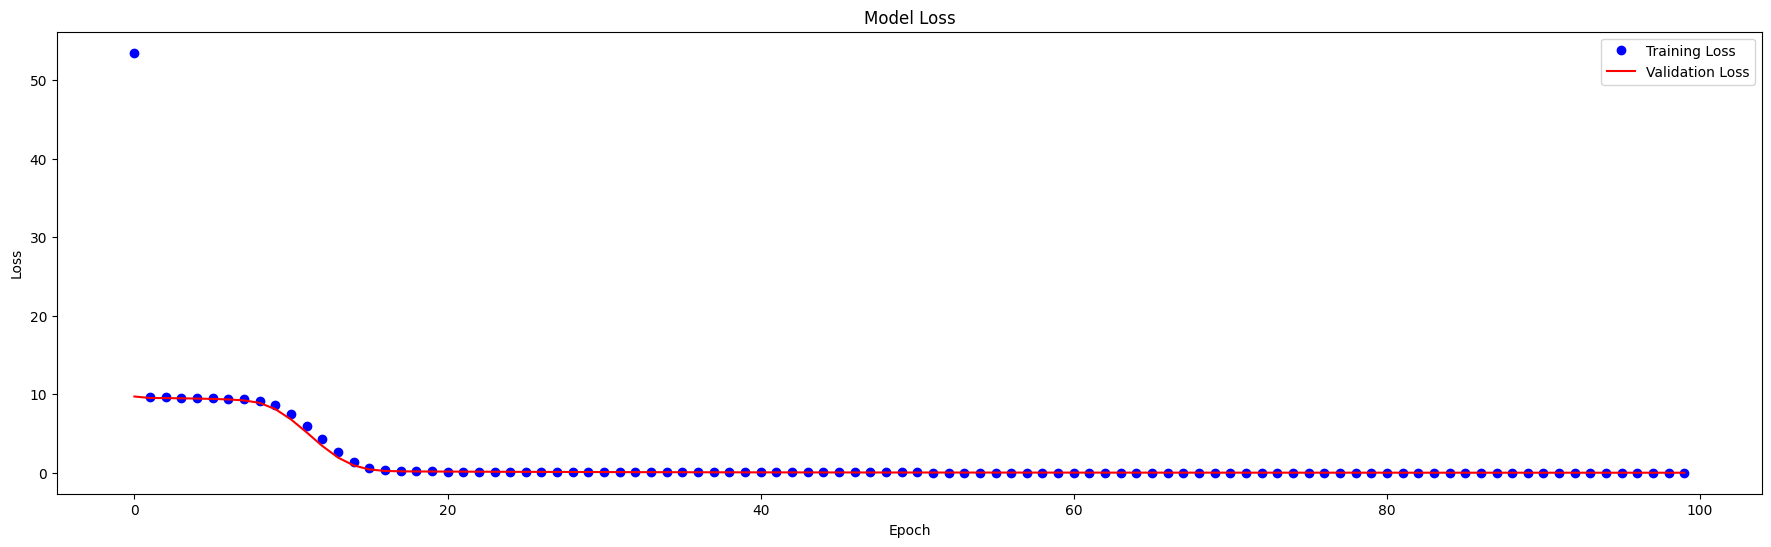

In [30]:
# Vẽ biểu đồ loss
plt.figure(figsize=(22, 6))
plt.plot(history.history['loss'],'bo', label='Training Loss')
plt.plot(history.history['val_loss'], 'r', label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

In [31]:
# Lưu mô hình và scaler
model.save('lottery.keras')
joblib.dump(scaler, 'scaler.gz')

['scaler.gz']

In [32]:
# Nhập ngày cần lấy dữ liệu
ngay = (datetime.now() - timedelta(days=1)).strftime('%Y-%m-%d')
ngay

'2024-02-23'

In [33]:
# Tạo dictionary giữa các cột từ zero đến nine và dự đoán tương ứng
row_scaled = scaler.transform(df.loc[df['Date'] == ngay, 'Zero':'Nine'].values)
predictions_dict = {col_name: prediction for col_name, prediction in zip(NUM_COLS, model.predict(row_scaled.reshape((row_scaled.shape[0], 1, row_scaled.shape[1])))[0])}
predictions_dict

1/1 [==============================] - 0s 253ms/step


{'Zero': 11.039977,
 'One': 5.8486037,
 'Two': 11.032748,
 'Three': 10.995294,
 'Four': 10.991504,
 'Five': 11.06459,
 'Six': 7.9434404,
 'Seven': 13.029558,
 'Eight': 13.105183,
 'Nine': 12.057789}

In [34]:
# Kết quả dự đoán cao nhất và thấp nhất
predictions_items = predictions_dict.items()
print(f'''Cặp số có giá trị dự đoán cao nhất: {dict(sorted(predictions_items, key=lambda x: x[1], reverse=True)[:2])}
Cặp số có giá trị dự đoán thấp nhất: {dict(sorted(predictions_items, key=lambda x: x[1])[:2])}''')

Cặp số có giá trị dự đoán cao nhất: {'Eight': 13.105183, 'Seven': 13.029558}
Cặp số có giá trị dự đoán thấp nhất: {'One': 5.8486037, 'Six': 7.9434404}
